# Fundamentals of Data Analysis (FoDA) - Project 2020

                                                                          Author: Sheldon D'Souza, email: G00387857@gmit.ie

***

## Objective

The objective of the project is to perform and explain simple linear regression using Python on the powerproduction dataset given. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

The git repository will contain, at a minimum, the following items:
1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance the submission, consider comparing simple linear regression to other types of regression on this data set.

## Project Plan:

- Use lecture notes from FoDA and ProgDA modules (Machine learning - sklearn) which goes regression and machine learning concepts
- Read through and research linear regression and other forms of regression (e.g. exponential etc)
- add powerproduction.csv to the repository
- load the csv file into a pandas dataframe
- analyse the data to ensure its integrity
- plot the data using a lineplot and regression plot
- use sklearn to perform linear regression and analyse the results
- perform other sorts of analysis


## Introduction

What is regression and the forms of regression


**[TO BE COMPLETED]**


What is the purpose and uses of regression

**[TO BE COMPLETED]**


About the dataset

**[TO BE COMPLETED]**

- values, columns, independent and dependent variables, known and expected relationship between etc.



## Import the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')



## Import the csv and load pandas dataframe

In [2]:
df = pd.read_csv('powerproduction.csv', sep=',')

## Analyse the dataset

#### Analyse the head of the dataframe

In [3]:
df.head(10) #Analyse the first few rows

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


#### Analyse the tail of the dataframe

In [4]:
df.tail(10) #Analyse the last  few rows

,speed,power
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


#### Analyse the summay of the dataframe

In [5]:
df.describe() # check summary of data

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


#### Commentary on analysis of the above dataset

As can be seen from above:
- The data has no missing values and has the same number of observations for both columns/variables
- As typical for Wind Turbines there is a cut-in value and a cut-off value i.e. the wind speed before which the power output is nil (or minimal) and the wind speed after which the power remains constant respectively.
- A number of observations for power are Nil even after within the range of the cut-in and cut-off values. Furthermor, as can be seen from the analysis of the tail of the data the ending values of the dataset are mainly Nil. This could be anomolies in oberving and recording or it could be errors/anamolies in the actual equipment from which the data was recorded. This could also be due to the wind turbine being shut off at higher speeds.
- The highest value of power recorded is 113.5 
- See section below for further analysis of nil values

#### Data where 'power' variable is Nil

In the cells below, I did a check to see how many values of power had a nil value. We made the following observations:

- Speed values of 0.275 and less and nil power output. This could be explained by the wind speed being two low to generate any power i.e. there is a mimimum threshold of wind speed to generate power.
- Speed values of 24.499 and above had nil power output. We would expect that after a certain windspeed, there would be no further incresase in power output. I would have expected these speed variables to have a constant value (of the maximum output) rather than a nil value
- There were certain values in the middle where the power was nil for a moderate amount of speed. I have assumed that these are anomalies in the data. I have ignored them for the purpose of the linear regression analysis below, as I do not believe that they will have a material impact on that analysis. I have however cleaned up the nil values while generating my customised model later in this notebook.
- Speed values are only Nil in the very first item of data

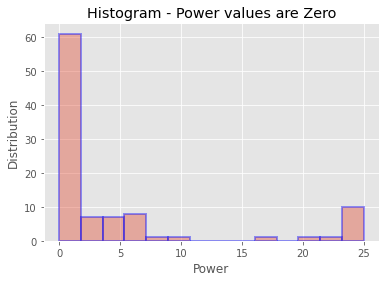

In [30]:
# dataframe where power is zero

zeros = df.loc[df['power'] == 0]

# Plot a histogram of zero values generated

sns.distplot(zeros, kde=False, hist_kws=dict(edgecolor="b", linewidth=2))
plt.title('Histogram - Power values are Zero')
plt.xlabel('Power')
plt.ylabel('Distribution')
plt.show()


## Data visualisation - Scatterplot with seaborn

#### Plot the scatterplot of the dataset

The scatterplot below is a visual representation of the speed and power variables witin the dataset. We can see that the plot forms an S curve.

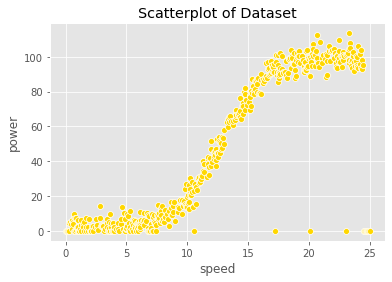

In [7]:
# Plot the data points as a scatterplot to visualise the data

sns.scatterplot(data = df, x="speed", y="power", color='gold')
plt.title('Scatterplot of Dataset')
plt.show()

#### Linear Regression Plot with seaborn

The following plot via the seaborn package shows the linear regression line on the dataset.  

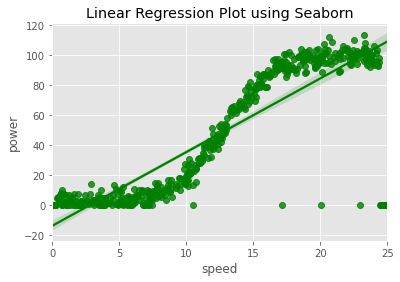

In [8]:
#use the linear regresssion plot within seaborn, to visualise the linear regression line

sns.regplot(data = df, x="speed", y="power", color='green')
plt.title('Linear Regression Plot using Seaborn')
plt.show()

#### Calculate the coerrelation coefficient and R-squared for the entire dataset

The following cells calculates the correlation coefficient and the R-squared values of the dataset. As can be seen the Correlation coefficient is 85% and the R-Squared value is 72% which can be deemed a reasonable value in terms of the data being observed.


As per Investopedia: https://www.investopedia.com/terms/r/r-squared.asp:
> R-squared explains to what extent the variance of one variable explains the variance of the second variable. So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

>What is a good R-Squared Value
What qualifies as a “good” R-Squared value will depend on the context. In some fields, such as the social sciences, even a relatively low R-Squared such as 0.5 could be considered relatively strong. In other fields, the standards for a good R-Squared reading can be much higher, such as 0.9 or above. 

In other words while, 72% is a resonable R-Squared value for a dataset, the S shaped nature of the curve means that the predictions based on the linear regression model may not be as accurate as desired.

We will look at the predictions and correlation coefficents of various models, including a customised model in the sections below.

In [9]:
correlation_xy = np.corrcoef(df['speed'],df['power'])[0,1]


r_squared = correlation_xy**2

print('Correlation Coefficient is', round(correlation_xy * 100, 2), '%')
print('R-Squared Value is', round(r_squared*100, 2),'%')

Correlation Coefficient is 85.38 %
R-Squared Value is 72.89 %


## Linear Regression Model

We will first explore the linear regression model in the Scikit-Learn module, in order to predict the wind turbine power from wind speed observations.

In order to do this we will import the Linear Regression model from Sklearn. We import also the test, train module from sklearn in order to check the accuracy of the predictions from our model. 

We reshaped the data in order to extract the test and train samples from the data. We then used the fit function in order to train the Linear Regression model.

We extracted the r-squared values and the coefficients from the data. The r-squared value was consistent with the calcululation in the above section using numpy.

We then used the model to predict the values of the 'test' sample and compared it with the actual values. We also plotted a graph of the predicted and actual values using the model and calculated the correlation coefficient of them. 

#### Reshape data and obtain train and test data for the Linear Regression model

In [10]:
#Reshape the data for the linear model

X = df.iloc[:, :-1].values 
y = df.iloc[:, 1].values

In [11]:
#Split the dataset into train and test proportions (80% train and 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Fit the train data to the Linear Regression model

In [12]:
#Instantiate the linear model and fit the training data to the model

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

#### Calculate the R-Squared and Coeficcients for the Linear Regression model

In [13]:
lin_model.score(X, y) # R-Squared value from the model

0.7286444280955426

In [14]:
print(lin_model.intercept_) #The y intercept  of the linear regression line

-15.270886657797988


In [15]:
print(lin_model.coef_) # The coefficient or 'slope' of the linear regression line

[5.01316827]


#### Make predictions on the test data based on the trained model

In [16]:
y_pred_lin = lin_model.predict(X_test) #Generate the predicted data based on the linear model

#### Analyse the output from the Train and Test Linear Regression Model

     Speed   Actual   Predicted
0   24.499    0.000  107.546723
1    3.428    6.819    1.914254
2   17.417   95.396   72.043465
3   23.899  100.089  104.538822
4   19.545   98.272   82.711487
..     ...      ...         ...
95  24.349   93.078  106.794748
96   8.884   16.697   29.266100
97  10.661   26.927   38.174500
98  14.139   66.596   55.610300
99  21.622  103.433   93.123838

[100 rows x 3 columns]
The R-Squared value for the Predicted vs Actual Data is: 68.63618272963468 %
The power prediction for the wind speed of 50 is: [235.38752695]


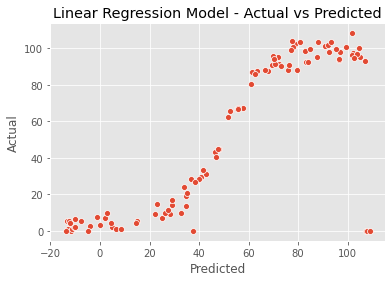

In [17]:
# Build a dataframe to hold the Actual and Predicted data
# ---------------------------------------------------------

act_vs_pred_lin = pd.DataFrame({'Speed': X_test.reshape(-1), 'Actual': y_test, 'Predicted': y_pred_lin})


# Plot the Actual vs the Predicted data
# --------------------------------------

sns.scatterplot(act_vs_pred_lin['Predicted'], act_vs_pred_lin['Actual'])
plt.title('Linear Regression Model - Actual vs Predicted')

# Print the dataframe showing the actual and predicted values
# ------------------------------------------------------------

print(act_vs_pred_lin)


# Print the R-Squared value of the predicted and actual data
# -----------------------------------------------------------
print('The R-Squared value for the Predicted vs Actual Data is:', (np.corrcoef(act_vs_pred_lin['Predicted'],act_vs_pred_lin['Actual'])[0,1])**2*100, '%')


# Test the prediction of from the model for data outside the original dataset
# ----------------------------------------------------------------------------

test_predict = np.array(50).reshape(-1,1) # Test the impact of a higher value than in the orginal dataset.
print('The power prediction for the wind speed of 50 is:', lin_model.predict(test_predict))


#### Observations from the Linear Regression model

- We would expect the scatterplot of the actual vs predicted to be a straight line as we would expect the predicted and actual values to be identical (for a perfect model).
- Interestingly the shape of the scatterplot of comparisons very closely mirrors the original data. This makes sense as a linear fit will cause linear differences between the predicted and the actual data and hence the shape of the data in the above scatteplot will be maintained.
- The middle value will give a better fit than the top and bottom of the S curve of the plot. This is because the middle values of the curve have a more 'Linear' relationship than either end of the curve.
- If we look at the predicted vs actual table, we can see that the predicted values are consistently lower than the actual values except where for wind speeds between 0 and 12 which yeild predictions that are greater than the actual values. Once again the main reason for this is that a linear model is being fit to S shape data and so there will be consistent deviations in the predicted vs actual data where the S shape is the most prominent.
- If we try to predict higer values of 'speed' than those in the actual data, we will see the 'power' input consistently increase. This is because we are using a linear model which does not take into account the 'cut-off' values of the speed on the wind turbine. In the test case above, a speed of 50 will give a power observation in the 200's, which will be unlikely given that the maximum actual observed data is circa 113 and that the data has an S shape which flattens out at the higher wind speeds.
- As we have not used the 'random_state' argument in the test/train extraction, the test and train samples will be different each time we run the notebook and this could have an impact on the output. Overall we expect the observations to remain consistent.

## Using the Lasso Regression model

We explored the Lasson Regression model to see whether we could enhance the Linear regression.

As per the Wikipedia page:

>In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

The Lasso model is used to enhance the Linear Regression model and hence we will observe whether this will have a significant impact on the predictions of the model. It does this by shrinking and regularising the coefficients within the linear model to produce more accurate predictions. 

The main argument within the Lasso model is the alpha value.

As per https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/:

>α = 0: Same coefficients as simple linear regression
>
>α = ∞: All coefficients zero
>
>0 < α < ∞: coefficients between 0 and that of simple linear regression


We will use an alpha of 50 in order to check the efficacy of the Lasso model and see whether this improves our observations.

     Speed   Actual  Predicted
0   24.499    0.000  95.650620
1    3.428    6.819  10.776522
2   17.417   95.396  67.124287
3   23.899  100.089  93.233817
4   19.545   98.272  75.695882
..     ...      ...        ...
95  24.349   93.078  95.046420
96   8.884   16.697  32.753319
97  10.661   26.927  39.911084
98  14.139   66.596  53.920486
99  21.622  103.433  84.062049

[100 rows x 3 columns]
The R-Squared value for the Predicted vs Actual Data is: 68.63618272963473 %
The power prediction for the wind speed of 50 is: [198.36878126]


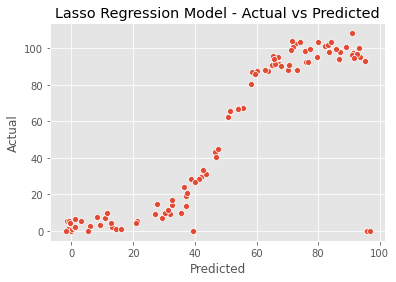

In [18]:
from sklearn import linear_model


# Train the lasso model by fitting the training data to the lasso model
# ---------------------------------------------------------------------

lasso = linear_model.Lasso(alpha=50)
lasso.fit(X_train, y_train)

# Generate predicted data based on the Test data
# ------------------------------------------------

y_pred_lasso = lasso.predict(X_test)


# Build a dataframe to hold the Actual and Predicted data
# ---------------------------------------------------------

act_vs_pred_lasso = pd.DataFrame({'Speed': X_test.reshape(-1), 'Actual': y_test, 'Predicted': y_pred_lasso})


# Plot the Actual vs the Predicted data
# --------------------------------------

sns.scatterplot(act_vs_pred_lasso['Predicted'], act_vs_pred_lasso['Actual'])
plt.title('Lasso Regression Model - Actual vs Predicted')

# Print the dataframe showing the actual and predicted values
# ------------------------------------------------------------

print(act_vs_pred_lasso)

# Print the R-Squared value of the predicted and actual data
# -----------------------------------------------------------

print('The R-Squared value for the Predicted vs Actual Data is:', (np.corrcoef(act_vs_pred_lasso['Predicted'], act_vs_pred_lasso['Actual'])[0,1])**2*100, '%')


# Test the prediction of from the model for data outside the original dataset
# ----------------------------------------------------------------------------

test_predict = np.array(50).reshape(-1,1) # Test the impact of a higher value than in the orginal dataset.
print('The power prediction for the wind speed of 50 is:', lasso.predict(test_predict))


#### Observation from the Lasso Regression Model
- The shape of the actual vs predicted does not seem signifcantly different to the similar Linear regression plot in the prevous section.
- By looking at the actual vs predicted values of the lasso regression table and comparing it to the linear regression table above, we can see that the predicted values have changed, but in most cases these have not changed signifcantly enough to make a substantial difference to the overall plot. Once again the values at the higher and lower values of the S curve seem to be more affected by the change to lasso than the middle values.
- Interestingly the R-Squared values are exactly the same for both the Linear and the Lasso models, which understandbly implies that, while the indivdual values have changed the overall shape of the distribution has not changed. The r-squared values remaining the same is an indication of this.
- We can see that predicting higher speed values (i.e. higher than in the original dataset) will yeild power values which are still above the maximum value within the dataset and not conistent with the S shape curve of a typical wind turbine dataset. However, the predictions under the lasso model are lower than the values generated using the Linear Regression model. If we continue to increase the alpha value, this will further come decrease. 

## Exploring Polynomial Regression

In the above section we have looked at a Linear regression models to predict power from the speed values given.

As we have observed though, the plot created by the dataset is a curve rather than a straight line. Therefore it makes sense to explore polynomial regression as a way to predict the 'power' output from the speed.

In order to do this I have used two methodologies for polynomial regression:
1. Polynomial Regression using Numpy
2. Polynomail Regression using Scikit-Learn

In the sections below we will perform polynomial regression on the dataset using numpy and sklearn and analyse the results of these including the accuracy of predictions from these models.

### Polynomial Regression in Using Numpy

In the code below, I have used the polyfit function within numpy to generate the coefficents for the poynomial equation to fit the curve. The polynomial degree was obtained by trial and error in terms of which regression line gave the best fit for the dataset.

I reshaped the train and test data used in the Linear regression section above, for use in the numy polynomial model as well.

I used the polyfit function nd the poly1d function to generate the polynomial equation or model for the curve based on the training data.

I then used numpy to calculate the correlation coefficient and r-squared value using the output of the polynomial model  and comparing this to the actual outputs of the original dataset.

Finally I plotted the original datset using pyplot (from matplotlib) and overlayed the scatterplot with the regression line generated from the model used.

Correlation Coefficient is 93.79 %
R-Squared Value is 87.96 %
The polynomial equation for polynomial dataset is: 
           3         2
-0.05119 x + 1.856 x - 12.68 x + 19.41


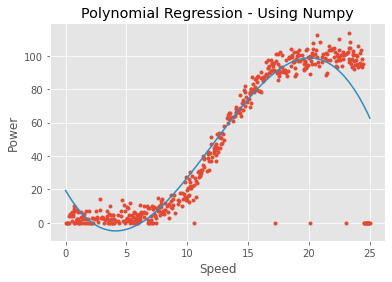

The power prediction for the wind speed of 50 is: -2373.1193787743714


In [77]:
# Ref: https://www.w3schools.com/python/python_ml_polynomial_regression.asp

# Assigned variables to speed and power for use in the polyfit function
# ------------------------------------------------------------------------

a =  df["speed"]
b = df["power"]



#Used the test and train data from the Linear Regression model above. Reshaped the data for use in the polyfit function.
# ----------------------------------------------------------------------------------------------------------------------
model_train_x = X_train.reshape(-1)
model_train_y = y_train.reshape(-1)

model_test_x = X_test.reshape(-1)
model_test_y = y_test.reshape(-1)


# Generated the polynomial model using polyfit and poly1d from numpy
# ------------------------------------------------------------------

poly_model = np.poly1d(np.polyfit(model_train_x, model_train_y, 3)) #Used polyfit to generate the coefficients


# Calculate the Correlation Coefficeints and R-Squared of the original dataset based on the generated polynomial model
# ----------------------------------------------------------------------------

poly_correlation_xy = np.corrcoef(b, poly_model(a))[0,1] # Calculated the correlation
                                             
poly_r_squared = poly_correlation_xy**2 # Calculated the R-Squared


# Print out the coefficients and the polynomial equation for the curve
# --------------------------------------------------------------------

print('Correlation Coefficient is', round(poly_correlation_xy * 100, 2), '%')
print('R-Squared Value is', round(poly_r_squared * 100, 2),'%')
print('The polynomial equation for polynomial dataset is: \n', 
      poly_model)


# Plot the datapoint of the dataframe and the regression line based on the trained model
# -------------------------------------------------------------------------------------------

plt.plot(a, b, '.', a, poly_model(a), '-') #plotted the original data with regression line fitted based on the trained model
plt.title('Polynomial Regression - Using Numpy')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

# Test the prediction of from the model for data outside the original dataset
# ----------------------------------------------------------------------------

print('The power prediction for the wind speed of 50 is:', poly_model(50))


     Speed   Actual  Predicted
0   24.499    0.000  70.117257
1    3.428    6.819  -4.295050
2   17.417   95.396  91.191638
3   23.899  100.089  77.787312
4   19.545   98.272  98.460466
..     ...      ...        ...
95  24.349   93.078  72.160854
96   8.884   16.697  17.390233
97  10.661   26.927  33.192847
98  14.139   66.596  66.529159
99  21.622  103.433  95.573133

[100 rows x 3 columns]


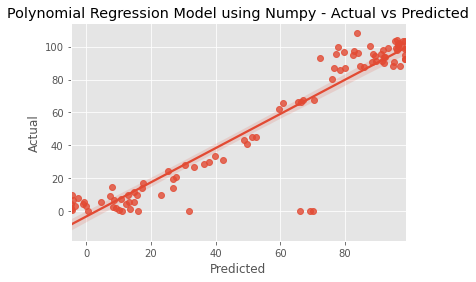

In [78]:
# Predict the test data based on the trained model and compared to actual test data
# ------------------------------------------------------------------------------------

act_poly_vs_pred_poly = pd.DataFrame({'Speed': X_test.reshape(-1), 'Actual': model_test_y, 'Predicted': poly_model(model_test_x)})


# Plot the actual vs predicted data to show visual representation of the relationship
# ---------------------------------------------------------------------------------------
sns.regplot(act_poly_vs_pred_poly['Predicted'], act_poly_vs_pred_poly['Actual']) #plotted the predicted vs actual data
plt.title('Polynomial Regression Model using Numpy - Actual vs Predicted')


# Print Comparison of Actual vs predicted
# ------------------------------------------------
print(act_poly_vs_pred_poly)


#### Observations from the Polynomial Regression model - Using Numpy

- We can see at a glance that using a polynomial model has signifcantly improved the overall predictability of the the data. This can be seen visually by observing that the pregression plot between actual and predicted data is a much more linear relationship then in the Linear Regression or Lasso Regression model
- The R-Squared value of the Polynomial Regression is, as expected, a signifcant improvement from the Linear and Lasso models, by more than 20 percentage points. Again, this is to be expected as the polynomial model will take into consideration and fit the S curve much better than the linear model. 
- The predictability of the model outside the dataset has worsened though. While the Linear and the Lasso Regression models predicted values for wind speed of 50 to be in and around the 200's, the polynomial regression model predicts this value to be in the negative thousands. This is a very poor prediction compared to the linear and lasso model. The reason for this is that the curve fit to the data has a stronger curvature at the top and bottom end of the 'S' curve which mean that when extrapolated at higher values, the curve begins to slope downwards steeply. This can easily be visually observed by looking at the regression line above for the model.
- I have used a polynomial degree of 3, as the benefit on the prediction and the R-squared values was not signifcantly improved when using a higher polynomial degree. While the predictability of some of the observations within the dataset get signifcantly better by increasing the 'degree' of the polynomial model, in fact the top part of the 'S' regression line got steeper (trending downwards) which led to predicted values outside the dataset being much worse when the polynomial degree was lower, say 3. I will explore a higher polynomial factor in the sklearn model below.
- As mentioned above, the shape of the regression curve is signifcantly dipped at only degree 3 of the polynomial. Some of this is due to the fact that the model is trained using what I see as anamolies in the power observation (see Nil power section earlier in this workbook). In order to check the impact of this on the model, I performed a test case in which I modelled the polynomial regression model with the zero values removed. See below for details on this.

#### ******Test Case******  Polynomial Regression using Numpy - Removing the Nil Power Values from the Dataset 

I wanted to check whether removing the nil values from the training dataset would have an impact model generated by using polynomial regression in numpy.

In order to do this I converted the training dataset (generated above) into a pandas dataframe. I then used the query function in pandas to remove all values where the power was nil. I realise this was oversimplying the problem a little, however based on my review of the Nil values distibution earlier in this notebook, I believe that this is not an unreasonable approach in order to test my hypothesis, that there will be some improvement in the'fit' by doing this.

I then trained the model based on the cleaned dataset and performed the rest of the steps as already described in the section above viz. generating the coefficients, r-squared values, plots for regression fit and actual v predicted and the prediction from outside the dataset. 

Correlation Coefficient is 92.65 %
R-Squared Value is 85.84 %
The polynomial equation for polynomial dataset is: 
           3         2
-0.04161 x + 1.588 x - 10.93 x + 18.79


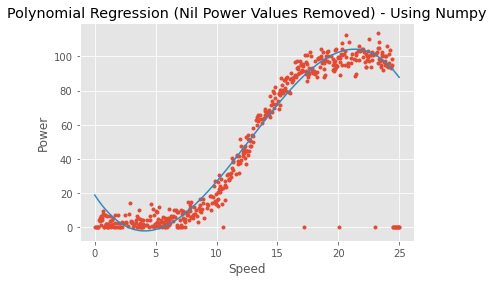

The power prediction for the wind speed of 50 is: -1759.3878864444846


In [81]:
# Convert the training dataset to a numpy array and remove all observations where power has a nil value
# ------------------------------------------------------------------------------------------------------

poly_np_df = pd.DataFrame({'speed':model_train_x, 'power':model_train_y}) # convert the training dataset to a dataframe

poly_np_nil = poly_np_df.query('power != 0') #use pandas query function to stip out the data where power values are nil 


# Generated the polynomial model using polyfit and poly1d from numpy using the cleaned training data
# --------------------------------------------------------------------------------------------------

poly_model_nil = np.poly1d(np.polyfit(poly_np_nil['speed'], poly_np_nil['power'], 3)) #Used polyfit to generate the coefficients


# Calculate the Correlation Coefficeints and R-Squared of the original dataset based on the generated polynomial model
# ----------------------------------------------------------------------------

poly_correlation_xy_nil = np.corrcoef(b, poly_model_nil(a))[0,1] # Calculated the correlation
                                             
poly_r_squared_nil = poly_correlation_xy_nil**2 # Calculated the R-Squared


# Print out the coefficients and the polynomial equation for the curve
# --------------------------------------------------------------------

print('Correlation Coefficient is', round(poly_correlation_xy_nil * 100, 2), '%')
print('R-Squared Value is', round(poly_r_squared_nil * 100, 2),'%')
print('The polynomial equation for polynomial dataset is: \n', 
      poly_model_nil)


# Plot the datapoint of the dataframe and the regression line based on the trained model
# -------------------------------------------------------------------------------------------

plt.plot(a, b, '.', a, poly_model_nil(a), '-') #plotted the original data with regression line fitted based on the trained model
plt.title('Polynomial Regression (Nil Power Values Removed) - Using Numpy')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

# Test the prediction of from the model for data outside the original dataset
# ----------------------------------------------------------------------------

print('The power prediction for the wind speed of 50 is:', poly_model_nil(50))

     Speed   Actual   Predicted
0   24.499    0.000   92.134249
1    3.428    6.819   -1.692819
2   17.417   95.396   90.220187
3   23.899  100.089   96.447365
4   19.545   98.272  101.016375
..     ...      ...         ...
95  24.349   93.078   93.309667
96   8.884   16.697   17.829315
97  10.661   26.927   32.307583
98  14.139   66.596   64.046637
99  21.622  103.433  104.131441

[100 rows x 3 columns]


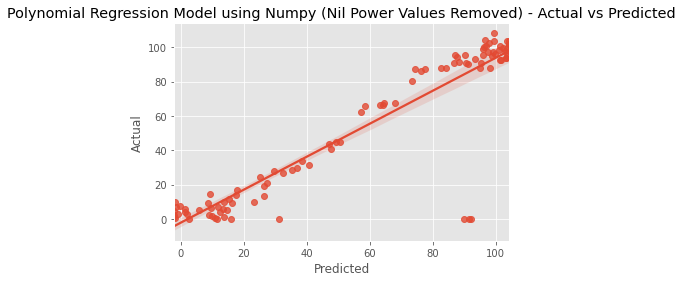

In [82]:
# Predict the test data based on the trained model and compared to actual test data
# ------------------------------------------------------------------------------------

act_poly_vs_pred_poly_nil = pd.DataFrame({'Speed': X_test.reshape(-1), 'Actual': model_test_y, 'Predicted': poly_model_nil(model_test_x)})


# Plot the actual vs predicted data to show visual representation of the relationship
# ---------------------------------------------------------------------------------------
sns.regplot(act_poly_vs_pred_poly_nil['Predicted'], act_poly_vs_pred_poly_nil['Actual']) #plotted the predicted vs actual data
plt.title('Polynomial Regression Model using Numpy (Nil Power Values Removed) - Actual vs Predicted')


# Print Comparison of Actual vs predicted
# ------------------------------------------------
print(act_poly_vs_pred_poly_nil)

##### Observations from the Polynomail Regression model using numpy with Nil values removed

- The first thing that is noticeable is that the regression curve fit on the actual data has improved compared to the original polynomial model. This is because the new polynomial equation/model built can ignore the outliers in the data and therefore provide a better fit.
- On closer observation, the overall R-Square value is not signifcantly different from the original model and while the individual predicted values are closer to the actual in some of the dataset, the plot between Actual vs Predicated values is not significantly different in either case of the polynomial models using numpy.
- Increasing the polynomial degree for the cleaned dataset had a much better result on predicability of this model compared the when the polynomial degree was increased for the original polynomial model. 
- There is a signifcant difference in the predicted values for the test data outside the original dataset. This is expected as the top of the S curve for the latter polynomial model is much less steeper than the former polynomial model. 

### Polynomial Regression using Sklearn

I compared the model generated through numpy with the polynomial regression model in sklearn.

While, I expected these to be the same, I wanted to demonstrate emperically that this is the case and to use the sklearn model for a higher degree of polynomial regression.

I obtained a lot of the ideas for this from the following blog: https://www.analyticsvidhya.com/blog/2020/03/polynomial-regression-python/

I created a Pipeline to automate the polynomial regression model in sklearn. I then trained the model by fitting the 'train' data to the model.

I then predicted the output of the test data using the model.

As above, I generated an printed out the following for the model:

- Regression plot for the predicted and actual values
- Table of predicted and actual values
- R-Squared values for the predicted and actual values
- The power prediction for a 'test' point of data, not within the original dataset


In [73]:
# Building the training model
# ================================

# importing libraries for polynomial transform

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline

# creating pipeline and fitting it on data
Input = [('polynomial',PolynomialFeatures(degree=10)),('model',LinearRegression())]
pipe = Pipeline(Input)

#Training the model
pipe.fit(X_train, y_train)


Pipeline(steps=[('polynomial', PolynomialFeatures(degree=10)),
                ('model', LinearRegression())])

     Speed   Actual  Predicted
0   24.499    0.000  56.789534
1    3.428    6.819   2.085399
2   17.417   95.396  92.708733
3   23.899  100.089  94.238889
4   19.545   98.272  95.964958
..     ...      ...        ...
95  24.349   93.078  70.210577
96   8.884   16.697  10.214107
97  10.661   26.927  26.636776
98  14.139   66.596  66.875692
99  21.622  103.433  95.418578

[100 rows x 3 columns]
The R-Squared value for the Predicted vs Actual Data is: 94.76365989099358 %
The power prediction for the wind speed of 50 is: [-96217893.88376601]


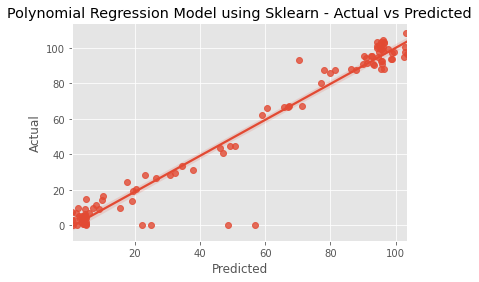

In [74]:
# Predicting the test data based on the polynomial features from sklearn
# ----------------------------------------------------------------------

poly_pred_sk = pipe.predict(X_test)

# Comparing predicted vs actual data
# ------------------------------------

act_vs_pred_poly_sk = pd.DataFrame({'Speed':X_test.reshape(-1), 'Actual': y_test, 'Predicted': poly_pred_sk}) 


# Plot the actual vs predicted data to show visual representation of the relationship
# ---------------------------------------------------------------------------------------

sns.regplot(act_vs_pred_poly_sk['Predicted'], act_vs_pred_poly_sk['Actual'])
plt.title('Polynomial Regression Model using Sklearn - Actual vs Predicted')

# Print Comparison of Actual vs predicted
# ------------------------------------------------

print(act_vs_pred_poly_sk)


# Print the R-Squared value of the predicted and actual data
# -----------------------------------------------------------

print('The R-Squared value for the Predicted vs Actual Data is:', (np.corrcoef(act_vs_pred_poly_sk['Predicted'], act_vs_pred_poly_sk['Actual'])[0,1])**2*100, '%')


# Test the prediction of from the model for data outside the original dataset
# ----------------------------------------------------------------------------

test_predict = np.array(50).reshape(-1,1) # Test the impact of a higher value than in the orginal dataset.
print('The power prediction for the wind speed of 50 is:', pipe.predict(test_predict))



#### Observations from Polynomial model using Sklearn

- The model given the same output for the same polynomial 'degree' as the numpy model. I compared both the outputs at the polynomial degree of '3' and there was no difference in any of the outputs from either the (original) polynomial model using numpy and the polynomial model using sklearn.
- I then increased the polynomial degree to 10 to see whether this would make a difference as to the fit or the predicatability of the model.
- The R-Squared value for the degree 10 model, as expected improved signifcantly from either of the previous models used (both Linear and Polynomial). However there is the issue of overfitting here. This is clearly seen when we try to predict the 'test' value using this model. The output value is in the tens of million which clearly shows that the model should not be used in these scenarios.
- There may be a case here where we could use this model for part of the curve i.e. where we have capped the upper and lower values
- I have explored this below in my customised model for regression for this data.

## Building a Customised Model for Regression

Analysing the original scatterplot data, it can be observed that the data form an S-Curve. In other words the curve remains constant at a certain upper and lower ranges of values for the independent variable. 

In the current dataset, we can see that the power output is nil or near to nil for certain values lower values of wind 'speed'. We also note that after a certain wind speed no additional power is generated.

Again, observing the data we can see that for windspeed of less 8 the power remains very low and can be estimated to be Nil. Also where the speed is > 18 the power remains constant at around 100. There also seem to be anomolies within the data where at random points in the dataset the power output seems to be zero. It is reasonable to assume that these are error in collecting, collating or recording the data.

I have produced a cleaned dataset to remove all observations where:
- The 'speed' is less than 8
- The 'speed' is greater than or equal than 18
- The 'power' is Nil

I then plotted the new dataset and calculated the correlation coefficient and the R-Squared values for the new dataset. As can be seen below the new dataset is highly correlated with a R-Squared value of 97%.

Correlation Coefficient is 98.49 %
R-Squared Value is 96.99 %
The polynomial equation for the clean dataset is:  
10.21 x - 79.95


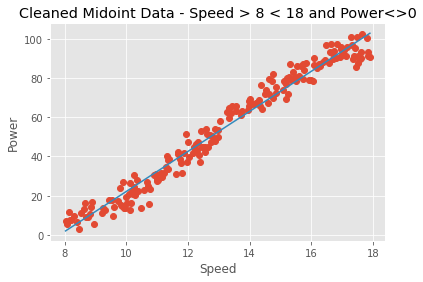

In [23]:
# Clean the dataframe to include only centre of the curve
# --------------------------------------------------------

clean_df = df.query('speed > 8  & speed < 18 & power != 0')


# Create Train and test data with pandas
#-----------------------------------------------
# Ref: https://stackoverflow.com/questions/39835021/pandas-random-sample-with-remove
# Ref: https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/


Train_clean = clean_df.sample(frac = 0.8)
Test_clean =  clean_df.drop(Train_clean.index)

X_train_clean = Train_clean['speed']
X_test_clean = Test_clean['speed']
y_train_clean = Train_clean['power']
y_test_clean  = Test_clean['power']


# Use polyfit to create the polynomial equation for the dataset using the training data
# -----------------------------------------------------------------------------------------

p_clean = np.poly1d(np.polyfit(X_train_clean, y_train_clean, 1))


# Calculate the Correlation Coefficeints and R-Squared of the cleaned dataset based on the trained model
# ------------------------------------------------------------------------------------------------------

clean_df_correlation_xy = np.corrcoef(clean_df['speed'],p_clean(clean_df['power']))[0,1]

clean_df_r_squared = clean_df_correlation_xy**2


# Print out the coeffients and the polynomial equation for the curve
# --------------------------------------------------------------------

print('Correlation Coefficient is', round(clean_df_correlation_xy * 100, 2), '%')
print('R-Squared Value is', round(clean_df_r_squared*100, 2),'%')
print('The polynomial equation for the clean dataset is:', p_clean)


# Plot the datapoint of the dataframe and the regression line based on the trained model
# -------------------------------------------------------------------------------------------

plt.plot(clean_df['speed'], clean_df['power'], 'o', clean_df['speed'], p_clean(clean_df['speed']), '-') #plotted the original data with regression line fitted based on the trained model
plt.title('Cleaned Midoint Data - Speed > 8 < 18 and Power<>0')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.style.use('ggplot')
plt.show()

I considered a mutistep model where the output values predicted would be based on a multi-step model based on the value of the input.

In essence this will be similar to the polynomial regression model above, however this will be more streamlined as it will segregate the highly correlated linear model data seperately.

I considered, using fixed output value for the data where the input range was <8 and >18, however, I decided it would be better to break down the data into the 3 components of the S curve (cut-in values and cut-off values) and use separate regression values for each of the component.

In the next code cell I segregated the data into the top and bottom component of the S curve and checked the best regression coefficients and technique for these components.

Correlation Coefficient is 40.5 %
R-Squared Value is 16.41 %
The polynomial equation for the clean dataset is: 
         2
0.1976 x - 1.096 x + 5.116


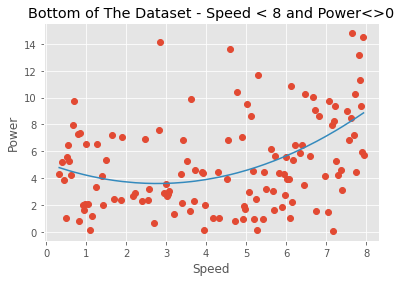

In [24]:
# Clean the dataframe to include only the bottom of the curve
# --------------------------------------------------------

bottom_clean_df = df.query('speed <=8 & power != 0')


# Create Train and test data with pandas
#-----------------------------------------------

Train_clean_bottom = bottom_clean_df.sample(frac = 0.8)
Test_clean_bottom =  bottom_clean_df.drop(Train_clean_bottom.index)

X_train_clean_bottom = Train_clean_bottom['speed']
X_test_clean_bottom = Test_clean_bottom['speed']
y_train_clean_bottom = Train_clean_bottom['power']
y_test_clean_bottom  = Test_clean_bottom['power']


# Use polyfit to create the polynomial equation for the dataset using the training data
# -----------------------------------------------------------------------------------------

p_bottom = np.poly1d(np.polyfit(X_train_clean_bottom, y_train_clean_bottom, 2))



# Calculate the Correlation Coefficeints and R-Squared of the cleaned dataset
# ----------------------------------------------------------------------------

bottom_clean_df_correlation_xy = np.corrcoef(bottom_clean_df['power'], p_bottom(bottom_clean_df['speed']))[0,1]
                                             
bottom_clean_df_r_squared = bottom_clean_df_correlation_xy**2



# Print out the coeffients and the polynomial euquation for the curve
# --------------------------------------------------------------------

print('Correlation Coefficient is', round(bottom_clean_df_correlation_xy * 100, 2), '%')
print('R-Squared Value is', round(bottom_clean_df_r_squared*100, 2),'%')
print('The polynomial equation for the clean dataset is: \n', 
      p_bottom)


# Plot the datapoint of the dataframe and the regression line based on the trained model
# -------------------------------------------------------------------------------------------

plt.plot(bottom_clean_df['speed'], bottom_clean_df['power'], 'o', bottom_clean_df['speed'], p_bottom(bottom_clean_df['speed']), '-')
plt.title('Bottom of The Dataset - Speed < 8 and Power<>0')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()



Correlation Coefficient is 19.85 %
R-Squared Value is 3.94 %
The polynomial equation for the clean dataset is:  
0.5113 x + 88


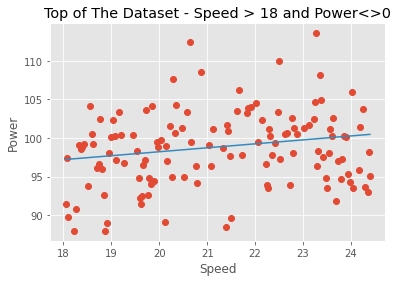

In [25]:
# Clean the dataframe to include only the top of the curve
# --------------------------------------------------------

top_clean_df = df.query('speed >=18 & power != 0')

# Create Train and test data with pandas
#-----------------------------------------------

Train_clean_top = top_clean_df.sample(frac = 0.8)
Test_clean_top =  top_clean_df.drop(Train_clean_top.index)

X_train_clean_top = Train_clean_top['speed']
X_test_clean_top = Test_clean_top['speed']
y_train_clean_top = Train_clean_top['power']
y_test_clean_top  = Test_clean_top['power']


# Use polyfit to create the polynomial equation for the dataset using the training data
# -----------------------------------------------------------------------------------------

p_top = np.poly1d(np.polyfit(X_train_clean_top, y_train_clean_top, 1)) #may be better to use linear function for this as well


# Calculate the Correlation Coefficeints and R-Squared of the cleaned dataset
# ----------------------------------------------------------------------------

top_clean_df_correlation_xy = np.corrcoef(top_clean_df['power'], p_top(top_clean_df['speed']))[0,1]
                                             
top_clean_df_r_squared = top_clean_df_correlation_xy**2


# Print out the coeffients and the polynomial euquation for the curve
# --------------------------------------------------------------------

print('Correlation Coefficient is', round(top_clean_df_correlation_xy * 100, 2), '%')
print('R-Squared Value is', round(top_clean_df_r_squared*100, 2),'%')
print('The polynomial equation for the clean dataset is:', p_top)


# Plot the datapoint of the dataframe and the regression line based on the trained model
# -------------------------------------------------------------------------------------------

plt.plot(top_clean_df['speed'], top_clean_df['power'], 'o', top_clean_df['speed'], p_top(top_clean_df['speed']), '-')
plt.title('Top of The Dataset - Speed > 18 and Power<>0')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()



#### Predictions based on the model

I used the Linear Regression model from sklearn to obtain the intercept and slope for the cleaned dataset. I then used the select function in numpy to 'predict' the 'power' variable based on certain conditions of the 'speed' data. These conditions mirrored the cleaned data criteria and are as follows:

- [TO BE COMPLETED]

      Speed   Actual  Predicted
373  18.744   96.642  97.581060
375  18.794   96.054  97.606624
377  18.869   87.986  97.644968
385  19.194  100.428  97.811130
401  19.945   99.472  98.195091
..      ...      ...        ...
123   6.181    5.347   5.891638
138   7.057    1.485   7.223028
146   7.307    4.243   7.658614
151   7.558    6.853   8.120791
154   7.683    7.245   8.360246

[91 rows x 3 columns]


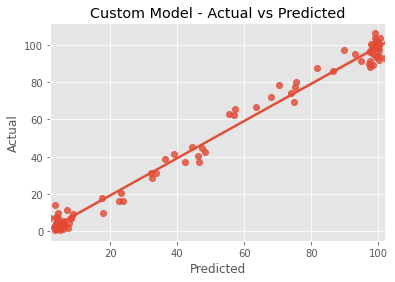

In [26]:
# Code for customised model

X_test_concat = pd.concat([X_test_clean_top, X_test_clean, X_test_clean_bottom])
y_test_concat = pd.concat([y_test_clean_top, y_test_clean, y_test_clean_bottom])


y_pred_model = np.select(
    (X_test_concat<= 8, 
     X_test_concat >= 18, 
     (X_test_concat > 8) | (X_test_concat < 18)), 
    (p_bottom(X_test_concat), 
     p_top(X_test_concat), 
     p_clean(X_test_concat)))



act_vs_pred_custom = pd.DataFrame({'Speed': X_test_concat, 'Actual': y_test_concat, 'Predicted': y_pred_model}) #comparing predicted vs actual data

sns.regplot(act_vs_pred_custom['Predicted'], act_vs_pred_custom['Actual'])
plt.title('Custom Model - Actual vs Predicted')


print(act_vs_pred_custom)


### Reference:

https://stackabuse.com/linear-regression-in-python-with-scikit-learn/